# Analyze Results of NSynth Transfer Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
## Load in transfer learning decoding results
## init x layer x train-test
results1 = np.load('Results/Regular-IF.npz')
results2 = np.load('Results/Regular-IF2.npz')

IF_Reg_class = results1['arr_0']
IF_Reg_class[3,:,:] = results2['arr_0'][3,:,:]
IF_Reg_class[4,:,:] = results2['arr_0'][4,:,:]

IF_Reg_pitch = results1['arr_1']
IF_Reg_pitch[3,:,:] = results2['arr_1'][3,:,:]
IF_Reg_pitch[4,:,:] = results2['arr_1'][4,:,:]

IF_Reg_vel = results1['arr_2']
IF_Reg_vel[3,:,:] = results2['arr_2'][3,:,:]
IF_Reg_vel[4,:,:] = results2['arr_2'][4,:,:]

In [3]:
results1 = np.load('Results/Regular-Pitch.npz')
results2 = np.load('Results/Regular-Pitch2.npz')

pitch_Reg_class = results1['arr_0']
pitch_Reg_class[3,:,:] = results2['arr_0'][3,:,:]
pitch_Reg_class[4,:,:] = results2['arr_0'][4,:,:]

pitch_Reg_pitch = results1['arr_1']
pitch_Reg_pitch[3,:,:] = results2['arr_1'][3,:,:]
pitch_Reg_pitch[4,:,:] = results2['arr_1'][4,:,:]

pitch_Reg_vel = results1['arr_2']
pitch_Reg_vel[3,:,:] = results2['arr_2'][3,:,:]
pitch_Reg_vel[4,:,:] = results2['arr_2'][4,:,:]

In [4]:
results1 = np.load('Results/Regular-Velocity.npz')
results2 = np.load('Results/Regular-Velocity2.npz')

vel_Reg_class = results2['arr_0']
vel_Reg_class[3,:,:] = results1['arr_0'][3,:,:]
vel_Reg_class[4,:,:] = results1['arr_0'][4,:,:]

vel_Reg_pitch = results2['arr_1']
vel_Reg_pitch[3,:,:] = results1['arr_1'][3,:,:]
vel_Reg_pitch[4,:,:] = results1['arr_1'][4,:,:]

vel_Reg_vel = results2['arr_2']
vel_Reg_vel[3,:,:] = results1['arr_2'][3,:,:]
vel_Reg_vel[4,:,:] = results1['arr_2'][4,:,:]

In [5]:
results1 = np.load('Results/Regular-Untrained.npz')
results2 = np.load('Results/Regular-Untrained2.npz')

untrained_Reg_class = results1['arr_0']
untrained_Reg_class[3,:,:] = results2['arr_0'][3,:,:]
untrained_Reg_class[4,:,:] = results2['arr_0'][4,:,:]

untrained_Reg_pitch = results1['arr_1']
untrained_Reg_pitch[3,:,:] = results2['arr_1'][3,:,:]
untrained_Reg_pitch[4,:,:] = results2['arr_1'][4,:,:]

untrained_Reg_vel = results1['arr_2']
untrained_Reg_vel[3,:,:] = results2['arr_2'][3,:,:]
untrained_Reg_vel[4,:,:] = results2['arr_2'][4,:,:]

In [6]:
results1 = np.load('Results/Deformable-IF.npz')

IF_Deform_class = results1['arr_0']
IF_Deform_pitch = results1['arr_1']
IF_Deform_vel = results1['arr_2']

In [7]:
results1 = np.load('Results/Deformable-Pitch.npz')

pitch_Deform_class = results1['arr_0']
pitch_Deform_pitch = results1['arr_1']
pitch_Deform_vel = results1['arr_2']

In [8]:
results1 = np.load('Results/Deformable-Velocity.npz')
results2 = np.load('Results/Deformable-Velocity2.npz')

vel_Deform_class = results1['arr_0']
vel_Deform_class[3,:,:] = results2['arr_0'][3,:,:]
vel_Deform_class[4,:,:] = results2['arr_0'][4,:,:]

vel_Deform_pitch = results1['arr_1']
vel_Deform_pitch[3,:,:] = results2['arr_1'][3,:,:]
vel_Deform_pitch[4,:,:] = results2['arr_1'][4,:,:]

vel_Deform_vel = results1['arr_2']
vel_Deform_vel[3,:,:] = results2['arr_2'][3,:,:]
vel_Deform_vel[4,:,:] = results2['arr_2'][4,:,:]

In [9]:
results1 = np.load('Results/Deformable-Untrained.npz')

untrained_Deform_class = results1['arr_0']
untrained_Deform_pitch = results1['arr_1']
untrained_Deform_vel = results1['arr_2']

In [10]:
## Baseline for NSynth transfer tasks
print('Pitch Regular')
print(np.round(np.mean(pitch_Reg_pitch[:,-1,:], axis = 0), 2),
     np.round(np.std(pitch_Reg_pitch[:,-1,:], axis = 0), 2))

Pitch Regular
[7.74 7.84] [0.11 0.11]


In [42]:
print('Pitch Deformable')
print(np.round(np.mean(pitch_Deform_pitch[:,-1,:], axis = 0), 2),
     np.round(np.std(pitch_Deform_pitch[:,-1,:], axis = 0), 2))

Pitch Deformable
[6.41 6.64] [0.12 0.14]


In [43]:
print('Velocity Regular')
print(np.round(np.mean(vel_Reg_vel[:,-1,:], axis = 0), 2),
     np.round(np.std(vel_Reg_vel[:,-1,:], axis = 0), 2))

Velocity Regular
[31.57 32.33] [0.07 0.1 ]


In [44]:
print('Velocity Deformable')
print(np.round(np.mean(vel_Deform_vel[:,-1,:], axis = 0), 2),
     np.round(np.std(vel_Deform_vel[:,-1,:], axis = 0), 2))

Velocity Deformable
[30.4  31.77] [0.11 0.05]


## Trained Features Enhanced and Suppressed

In [13]:
sns.set(font_scale = 2.5)
cdict = sns.color_palette("husl", 3)

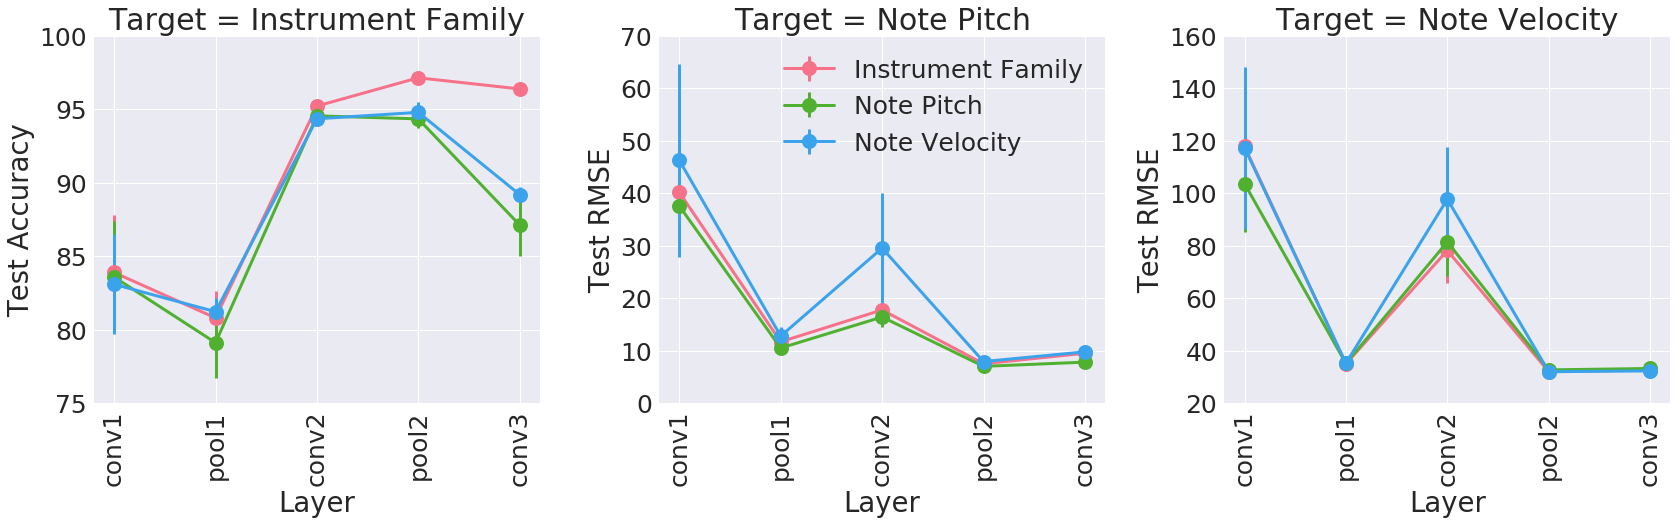

In [101]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.errorbar(np.arange(5), np.mean(IF_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Instrument Family', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(pitch_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Pitch', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(vel_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(vel_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Velocity', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.title('Target = Instrument Family')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
# plt.legend()

plt.subplot(1,3,2)
plt.errorbar(np.arange(5), np.mean(IF_Reg_pitch[:,:,-1], axis = 0), 
             yerr=np.std(IF_Reg_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Instrument Family', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(pitch_Reg_pitch[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Reg_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Pitch', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(vel_Reg_pitch[:,:,-1], axis = 0), 
             yerr=np.std(vel_Reg_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Velocity', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.title('Target = Note Pitch')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(0, 70)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(np.arange(5), np.mean(IF_Reg_vel[:,:,-1], axis = 0), 
             yerr=np.std(IF_Reg_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Instrument Family', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(pitch_Reg_vel[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Reg_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Pitch', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(vel_Reg_vel[:,:,-1], axis = 0), 
             yerr=np.std(vel_Reg_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Velocity', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.title('Target = Note Velocity')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.ylim(20, 160)
# plt.legend()
plt.xticks(np.arange(5), layers, rotation = 90)
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Regular.png')
pass

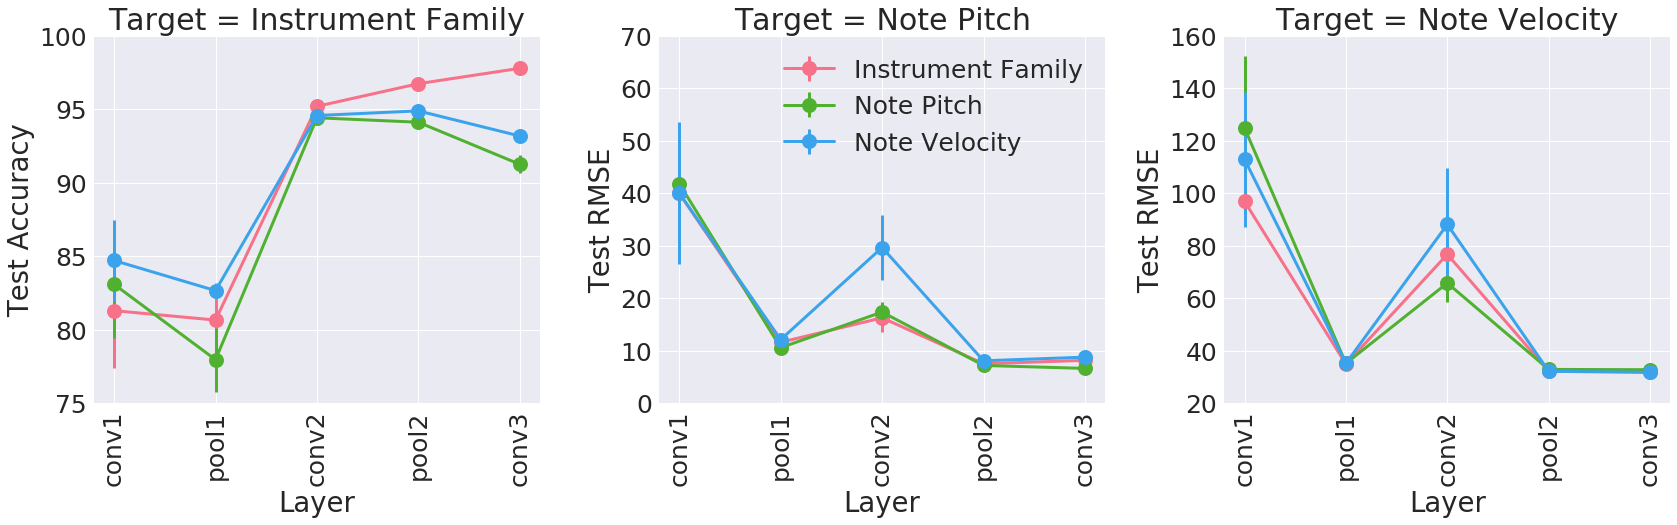

In [102]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.errorbar(np.arange(5), np.mean(IF_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Instrument Family', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(pitch_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Pitch', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(vel_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(vel_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Velocity', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.title('Target = Instrument Family')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(75,100)
# plt.legend()

plt.subplot(1,3,2)
plt.errorbar(np.arange(5), np.mean(IF_Deform_pitch[:,:,-1], axis = 0), 
             yerr=np.std(IF_Deform_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Instrument Family', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(pitch_Deform_pitch[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Deform_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Pitch', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(vel_Deform_pitch[:,:,-1], axis = 0), 
             yerr=np.std(vel_Deform_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Velocity', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.title('Target = Note Pitch')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(0,70)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(np.arange(5), np.mean(IF_Deform_vel[:,:,-1], axis = 0), 
             yerr=np.std(IF_Deform_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Instrument Family', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(pitch_Deform_vel[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Deform_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Pitch', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(vel_Deform_vel[:,:,-1], axis = 0), 
             yerr=np.std(vel_Deform_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Note Velocity', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.title('Target = Note Velocity')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
# plt.legend()
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(20, 160)
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Deformable.png')
pass

## Untrained Features

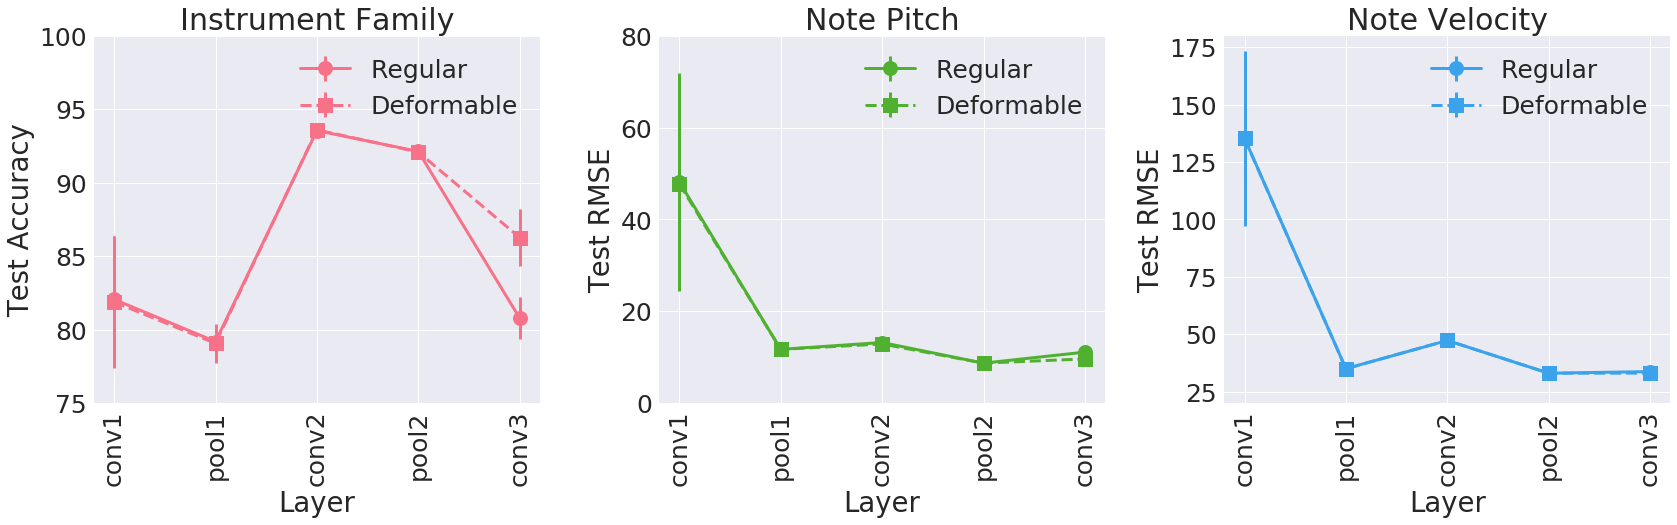

In [128]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(untrained_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0], linestyle = '--', marker='s')

plt.title('Instrument Family')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()

plt.subplot(1,3,2)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_pitch[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(untrained_Deform_pitch[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3, linestyle = '--',
            ms=15, color = cdict[1], marker='s')
plt.title('Note Pitch')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(0, 80)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_vel[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.errorbar(np.arange(5), np.mean(untrained_Deform_vel[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3, linestyle = '--',
            ms=15, color = cdict[2], marker='s')
plt.title('Note Velocity')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.ylim(20, 180)
plt.legend()
plt.xticks(np.arange(5), layers, rotation = 90)
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Untrained.png')
pass

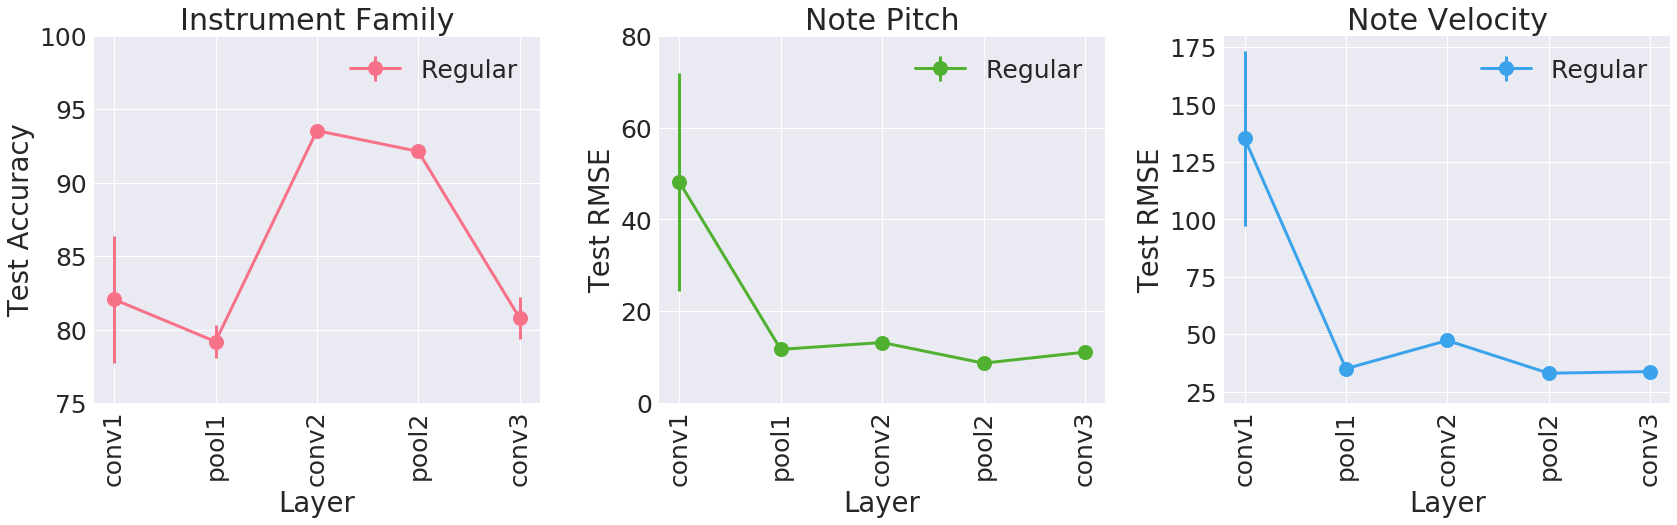

In [129]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])

plt.title('Instrument Family')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()

plt.subplot(1,3,2)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_pitch[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])

plt.title('Note Pitch')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(0, 80)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_vel[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])

plt.title('Note Velocity')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.ylim(20, 180)
plt.legend()
plt.xticks(np.arange(5), layers, rotation = 90)
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Untrained-Regular.png')
pass

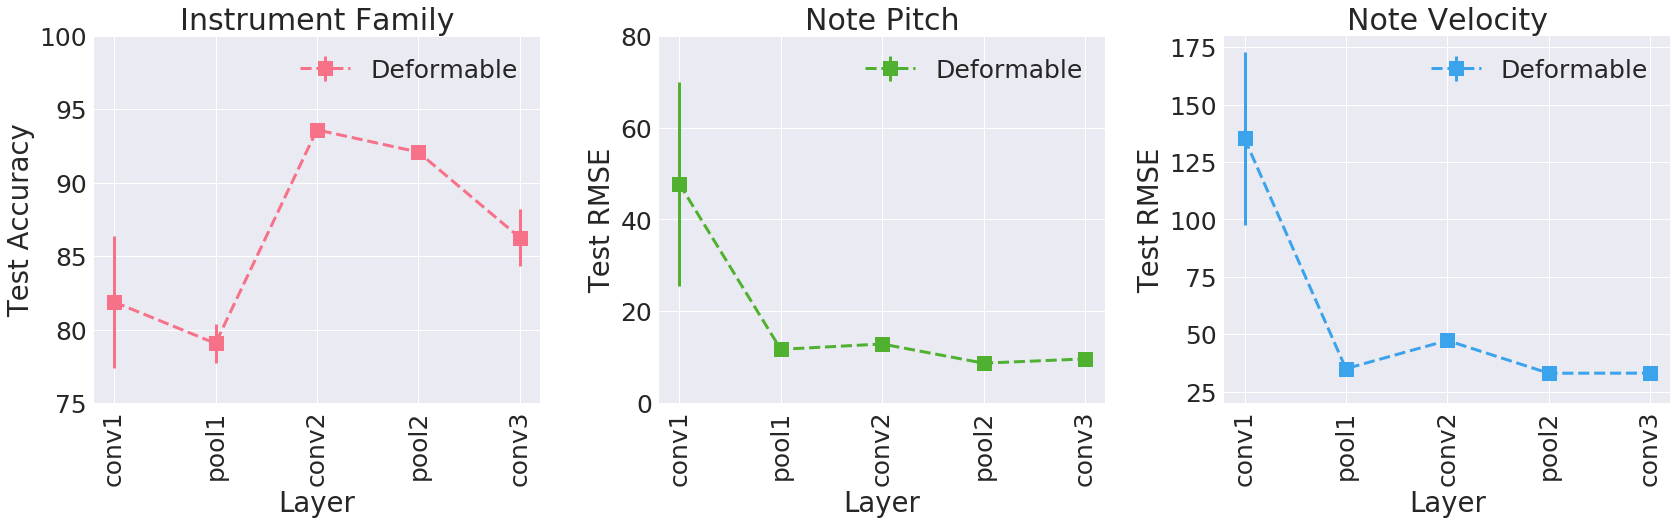

In [130]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)

plt.errorbar(np.arange(5), np.mean(untrained_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0], linestyle = '--', marker='s')

plt.title('Instrument Family')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()

plt.subplot(1,3,2)

plt.errorbar(np.arange(5), np.mean(untrained_Deform_pitch[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3, linestyle = '--',
            ms=15, color = cdict[1], marker='s')
plt.title('Note Pitch')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(0, 80)
plt.legend()

plt.subplot(1,3,3)

plt.errorbar(np.arange(5), np.mean(untrained_Deform_vel[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3, linestyle = '--',
            ms=15, color = cdict[2], marker='s')
plt.title('Note Velocity')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.ylim(20, 180)
plt.legend()
plt.xticks(np.arange(5), layers, rotation = 90)
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Untrained-Deformable.png')
pass

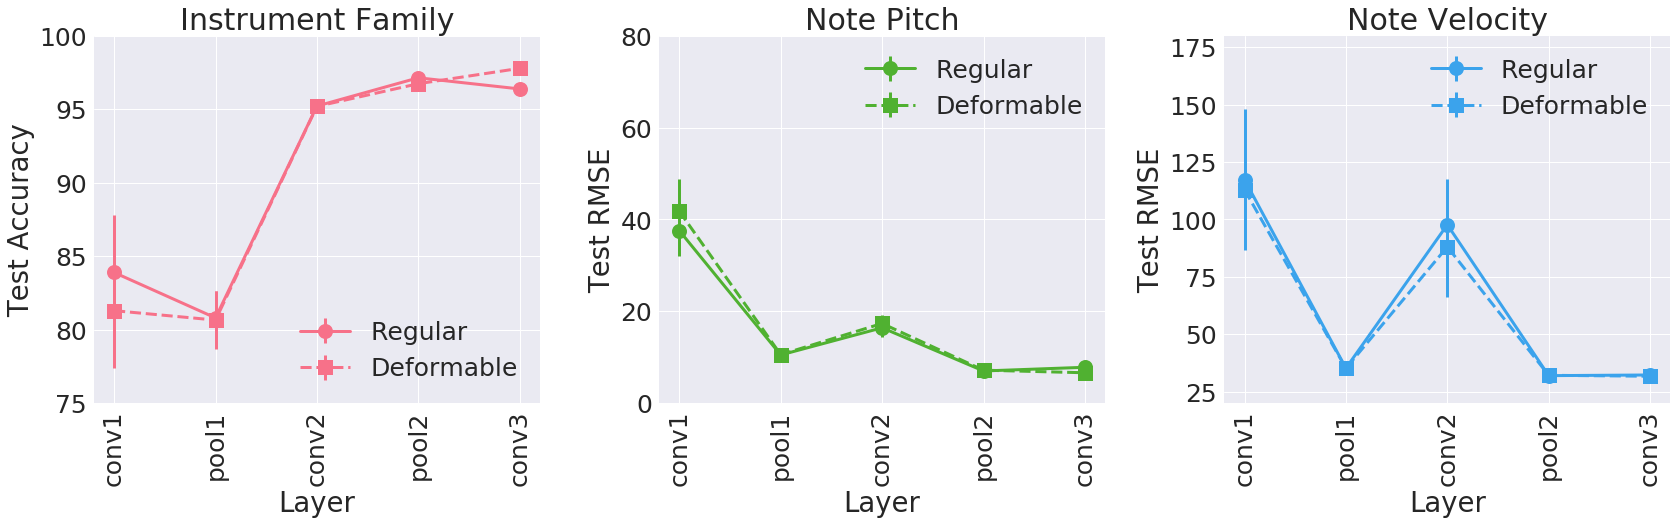

In [14]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
plt.errorbar(np.arange(5), np.mean(IF_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(IF_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0], linestyle = '--', marker='s')

plt.title('Instrument Family')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()

plt.subplot(1,3,2)
plt.errorbar(np.arange(5), np.mean(pitch_Reg_pitch[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Reg_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[1])
plt.errorbar(np.arange(5), np.mean(pitch_Deform_pitch[:,:,-1], axis = 0), 
             yerr=np.std(pitch_Deform_pitch[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3, linestyle = '--',
            ms=15, color = cdict[1], marker='s')
plt.title('Note Pitch')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.xticks(np.arange(5), layers, rotation = 90)
plt.ylim(0, 80)
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(np.arange(5), np.mean(vel_Reg_vel[:,:,-1], axis = 0), 
             yerr=np.std(vel_Reg_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[2])
plt.errorbar(np.arange(5), np.mean(vel_Deform_vel[:,:,-1], axis = 0), 
             yerr=np.std(vel_Deform_vel[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3, linestyle = '--',
            ms=15, color = cdict[2], marker='s')
plt.title('Note Velocity')
plt.xlabel('Layer')
plt.ylabel('Test RMSE')
plt.ylim(20, 180)
plt.legend()
plt.xticks(np.arange(5), layers, rotation = 90)
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Trained-Main-Tasks.png')
pass

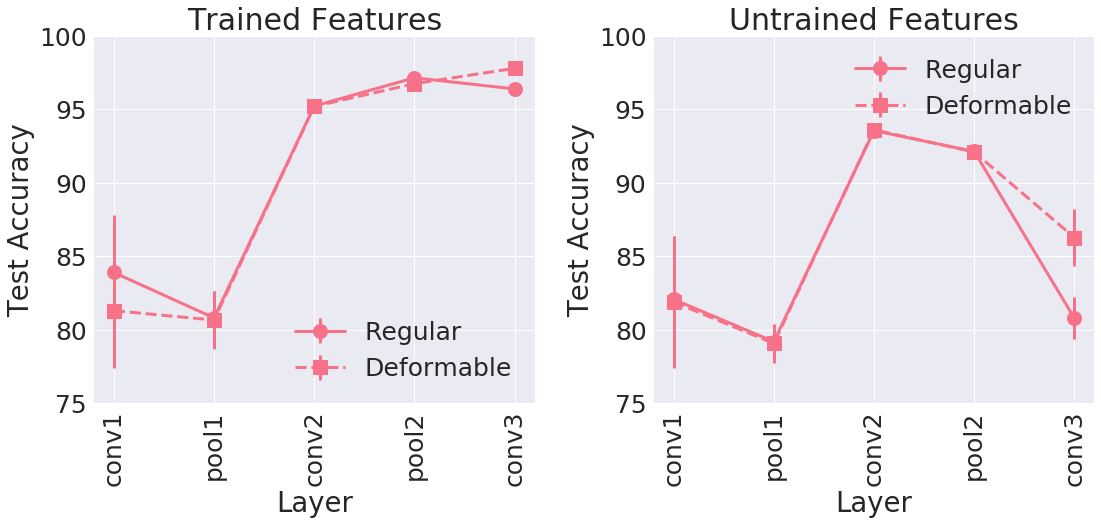

In [19]:
## init x layer x train-test
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.errorbar(np.arange(5), np.mean(IF_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])
plt.errorbar(np.arange(5), np.mean(IF_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0], linestyle = '--', marker='s')

plt.title('Trained Features')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()
plt.subplot(1,2,2)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0])

plt.errorbar(np.arange(5), np.mean(untrained_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[0], linestyle = '--', marker='s')

plt.title('Untrained Features')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Trained-vs-Untrained-IF.png')
pass

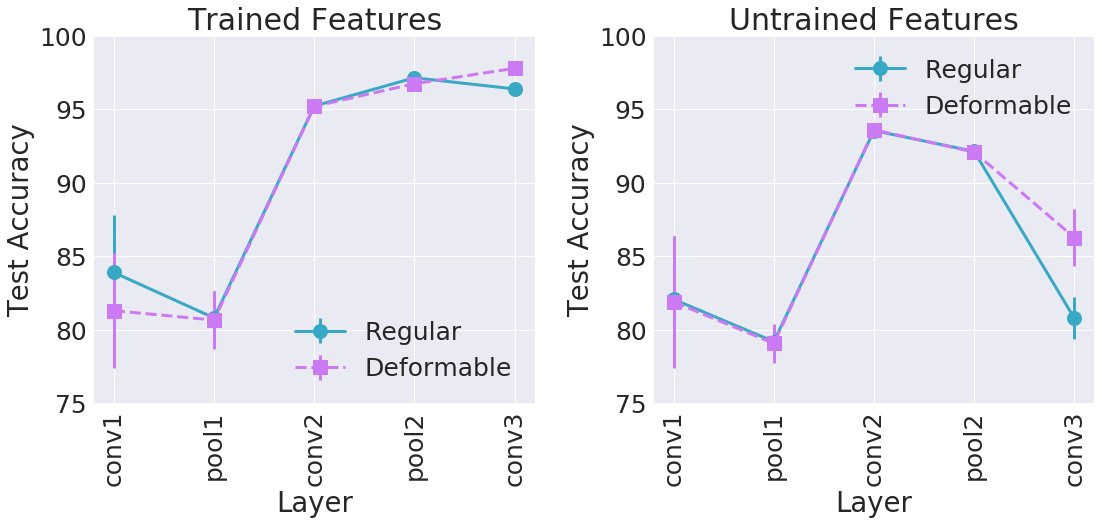

In [23]:
## init x layer x train-test
cdict = sns.color_palette("husl", 5)
layers = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3']
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.errorbar(np.arange(5), np.mean(IF_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[3])
plt.errorbar(np.arange(5), np.mean(IF_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(IF_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[4], linestyle = '--', marker='s')

plt.title('Trained Features')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()
plt.subplot(1,2,2)
plt.errorbar(np.arange(5), np.mean(untrained_Reg_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Reg_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Regular', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[3])

plt.errorbar(np.arange(5), np.mean(untrained_Deform_class[:,:,-1], axis = 0), 
             yerr=np.std(untrained_Deform_class[:,:,-1], axis = 0), fmt='-o',
            label = 'Deformable', elinewidth = 3, linewidth = 3,
            ms=15, color = cdict[4], linestyle = '--', marker='s')

plt.title('Untrained Features')
plt.xlabel('Layer')
plt.ylabel('Test Accuracy')
plt.ylim(75,100)
plt.xticks(np.arange(5), layers, rotation = 90)
plt.legend()
plt.tight_layout()
plt.savefig('Results/Enhanced-Suppressed-Trained-vs-Untrained-IF-2.png')
pass